[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12449 samples in 0.001s...
[t-SNE] Computed neighbors for 12449 samples in 1.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12449
[t-SNE] Computed conditional probabilities for sample 2000 / 12449
[t-SNE] Computed conditional probabilities for sample 3000 / 12449
[t-SNE] Computed conditional probabilities for sample 4000 / 12449
[t-SNE] Computed conditional probabilities for sample 5000 / 12449
[t-SNE] Computed conditional probabilities for sample 6000 / 12449
[t-SNE] Computed conditional probabilities for sample 7000 / 12449
[t-SNE] Computed conditional probabilities for sample 8000 / 12449
[t-SNE] Computed conditional probabilities for sample 9000 / 12449
[t-SNE] Computed conditional probabilities for sample 10000 / 12449
[t-SNE] Computed conditional probabilities for sample 11000 / 12449
[t-SNE] Computed conditional probabilities for sample 12000 / 12449
[t-SNE] Computed conditional probabilities for sam

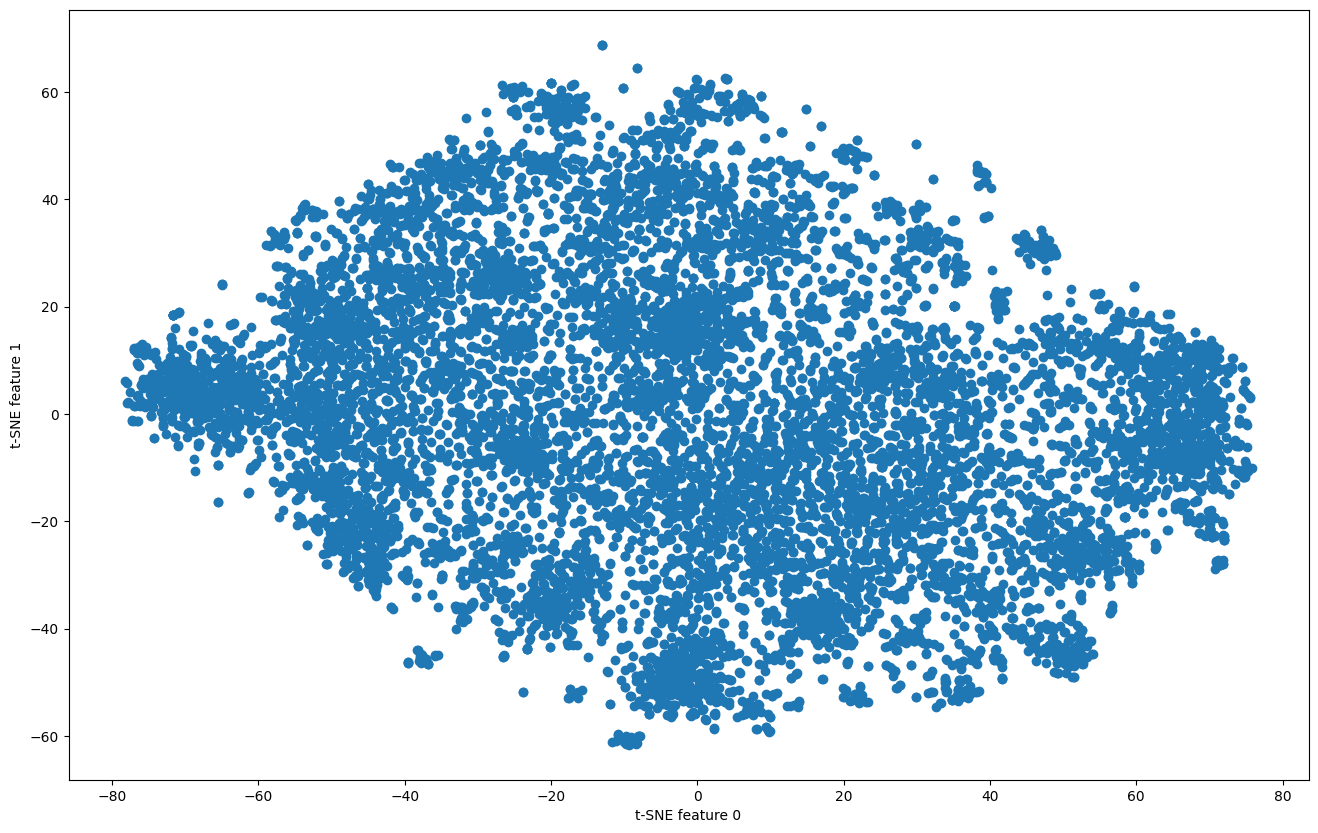

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from semantic.db import VectorDB

vdb = VectorDB()
vdb.load('vector-db-save-quantized')

embeddings = vdb.vectors

tsne = TSNE(n_components=2, verbose=1, perplexity=30, early_exaggeration=30, )
tsne_results = tsne.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12449 samples in 0.002s...
[t-SNE] Computed neighbors for 12449 samples in 1.808s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12449
[t-SNE] Computed conditional probabilities for sample 2000 / 12449
[t-SNE] Computed conditional probabilities for sample 3000 / 12449
[t-SNE] Computed conditional probabilities for sample 4000 / 12449
[t-SNE] Computed conditional probabilities for sample 5000 / 12449
[t-SNE] Computed conditional probabilities for sample 6000 / 12449
[t-SNE] Computed conditional probabilities for sample 7000 / 12449
[t-SNE] Computed conditional probabilities for sample 8000 / 12449
[t-SNE] Computed conditional probabilities for sample 9000 / 12449
[t-SNE] Computed conditional probabilities for sample 10000 / 12449
[t-SNE] Computed conditional probabilities for sample 11000 / 12449
[t-SNE] Computed conditional probabilities for sample 12000 / 12449
[t-SNE] Computed conditional probabilities for sam

/Users/omkaar/Desktop/Projects/patent-semantic-search/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


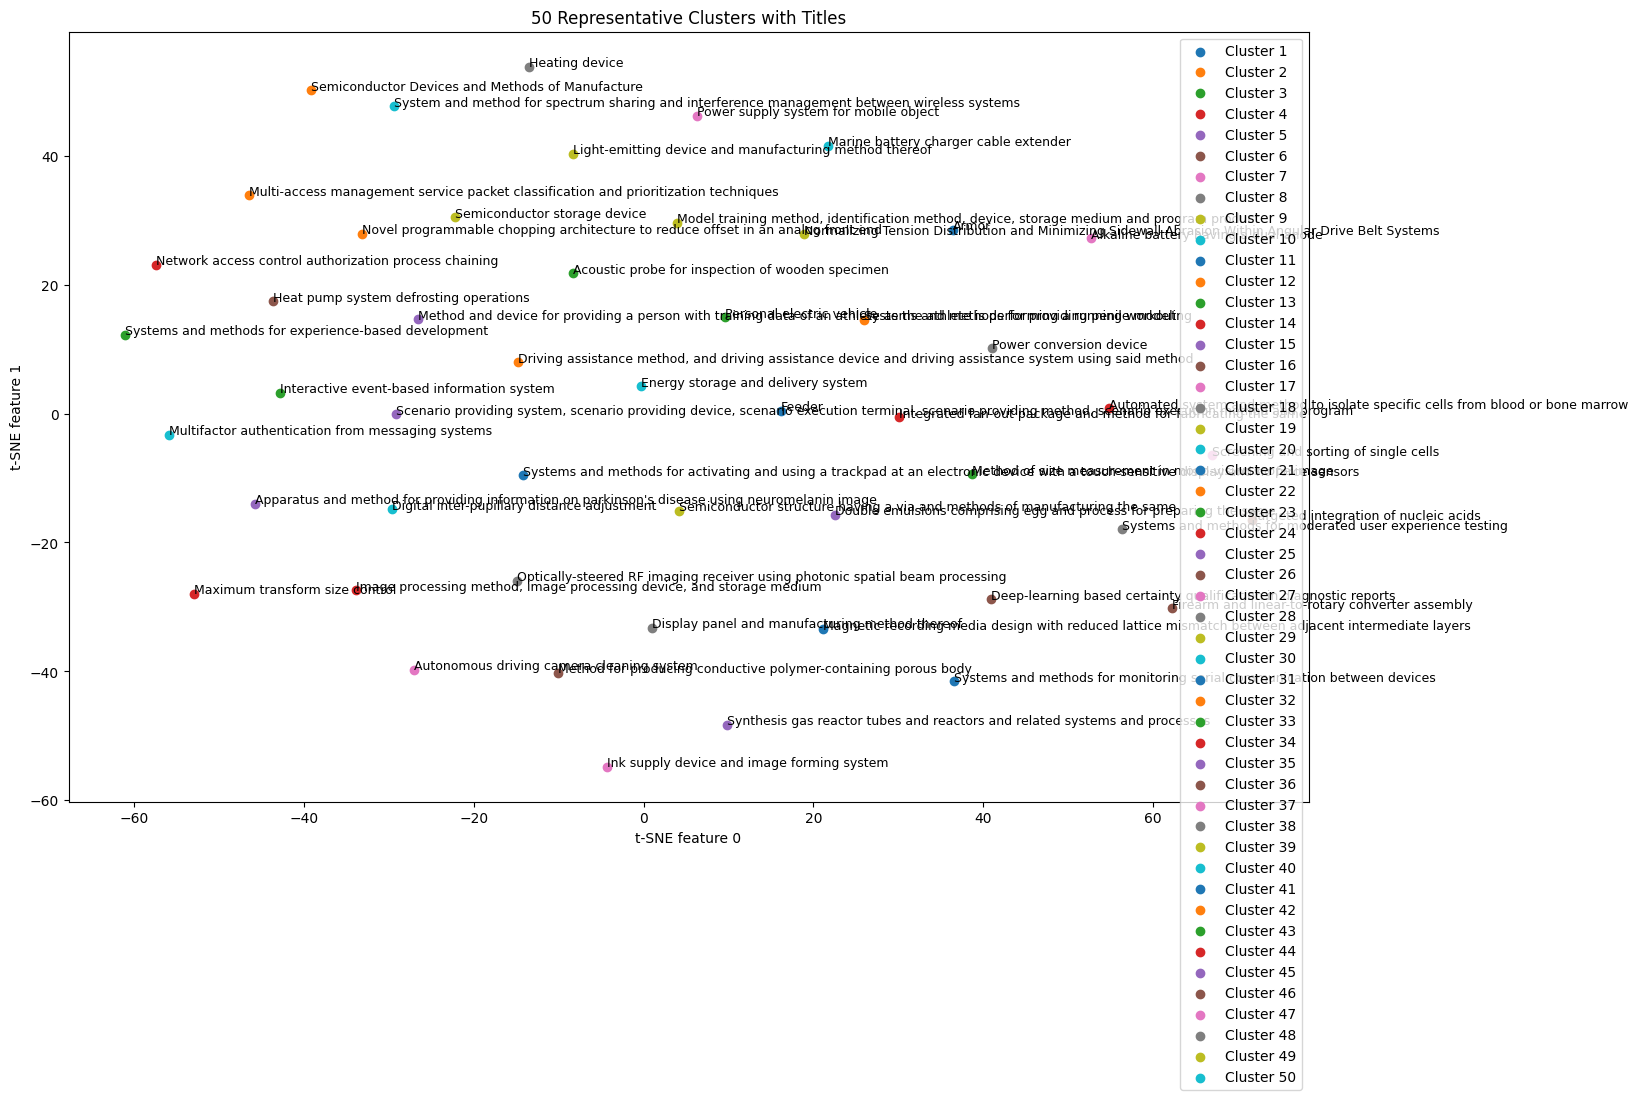

In [10]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from semantic.db import VectorDB

# Load your embeddings and titles
vdb = VectorDB()
vdb.load('vector-db-save-quantized')
embeddings, titles = vdb.vectors, vdb.titles

# Apply t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, early_exaggeration=30)
tsne_results = tsne.fit_transform(embeddings)

# Cluster the t-SNE results
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

# Find the representative title for each cluster
representative_titles = []
for i in range(num_clusters):
    # Find index of the point closest to the centroid of the cluster
    centroid = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(tsne_results[clusters == i] - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    representative_index = np.where(clusters == i)[0][closest_point_index]
    representative_titles.append(titles[representative_index])

# Plot the results
plt.figure(figsize=(16,10))
for i, point in enumerate(kmeans.cluster_centers_):
    plt.scatter(point[0], point[1], label=f'Cluster {i+1}')

    # Annotate the points with the representative titles
    plt.text(point[0], point[1], representative_titles[i], fontsize=9)

plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.title('50 Representative Clusters with Titles')
plt.legend()
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12449 samples in 0.002s...
[t-SNE] Computed neighbors for 12449 samples in 1.982s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12449
[t-SNE] Computed conditional probabilities for sample 2000 / 12449
[t-SNE] Computed conditional probabilities for sample 3000 / 12449
[t-SNE] Computed conditional probabilities for sample 4000 / 12449
[t-SNE] Computed conditional probabilities for sample 5000 / 12449
[t-SNE] Computed conditional probabilities for sample 6000 / 12449
[t-SNE] Computed conditional probabilities for sample 7000 / 12449
[t-SNE] Computed conditional probabilities for sample 8000 / 12449
[t-SNE] Computed conditional probabilities for sample 9000 / 12449
[t-SNE] Computed conditional probabilities for sample 10000 / 12449
[t-SNE] Computed conditional probabilities for sample 11000 / 12449
[t-SNE] Computed conditional probabilities for sample 12000 / 12449
[t-SNE] Computed conditional probabilities for sam

/Users/omkaar/Desktop/Projects/patent-semantic-search/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


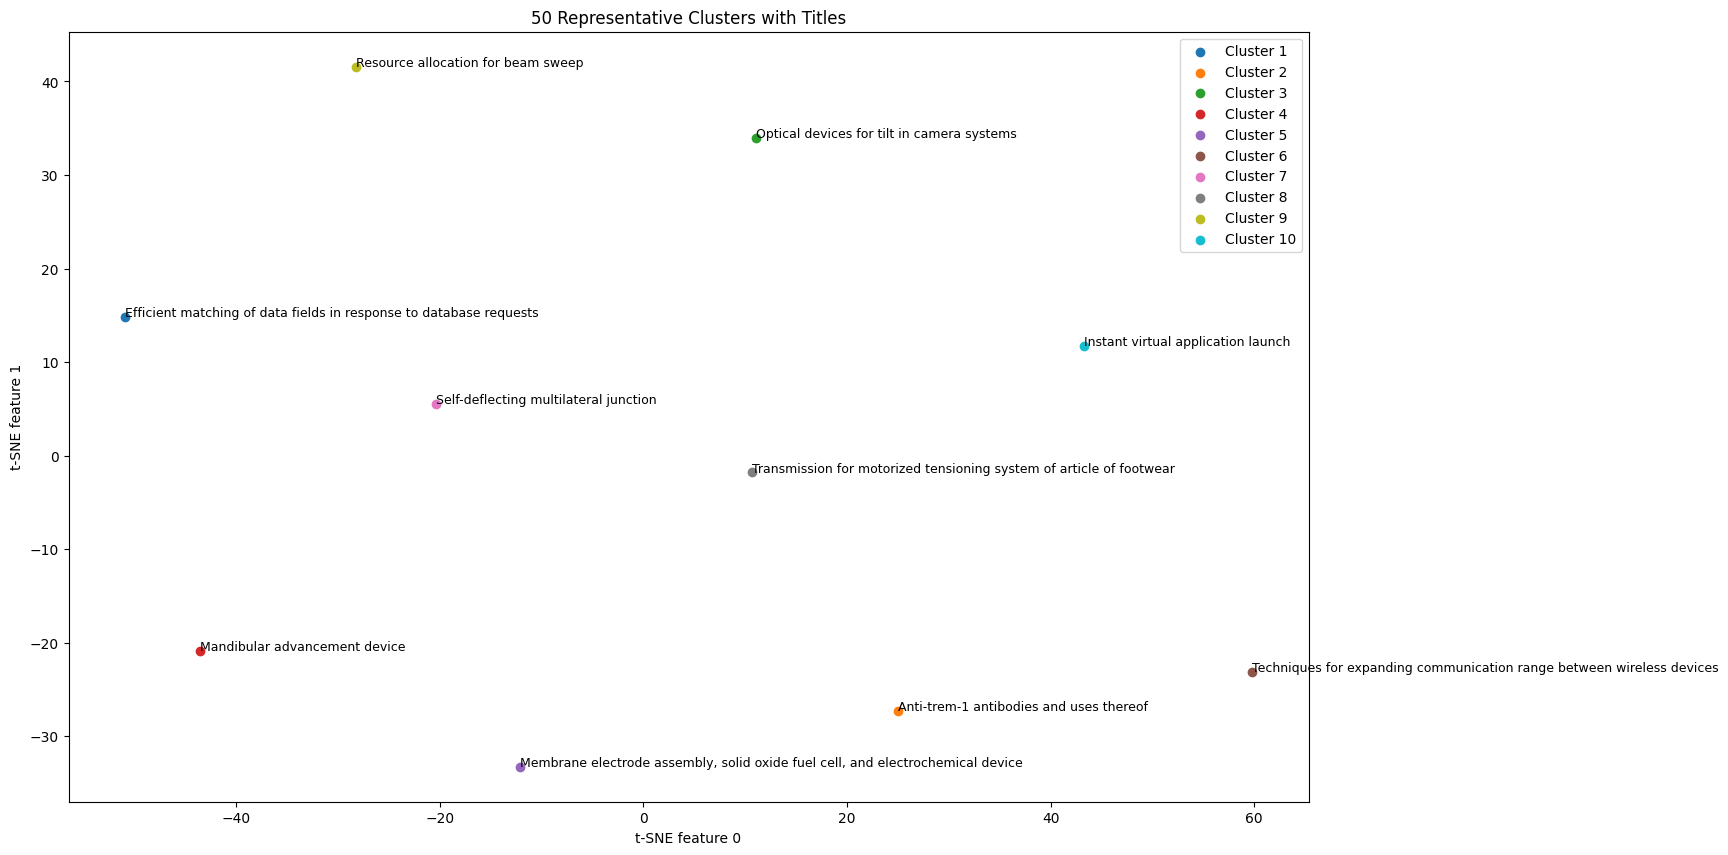

: 

In [11]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

# Find the representative title for each cluster
representative_titles = []
for i in range(num_clusters):
    # Find index of the point closest to the centroid of the cluster
    centroid = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(tsne_results[clusters == i] - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    representative_index = np.where(clusters == i)[0][closest_point_index]
    representative_titles.append(titles[representative_index])

# Plot the results
plt.figure(figsize=(16,10))
for i, point in enumerate(kmeans.cluster_centers_):
    plt.scatter(point[0], point[1], label=f'Cluster {i+1}')

    # Annotate the points with the representative titles
    plt.text(point[0], point[1], representative_titles[i], fontsize=9)

plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.title('50 Representative Clusters with Titles')
plt.legend()
plt.show()
